# GRUPO 10
Juan Diego Cruz Salazar

Luis Alejandro Barbosa

Sebastián Rodriguez

# ☀️ Generacion de energías renovables y condiciones climáticas

## Diccionario:


| Columna | Nombre                   | Tipo de dato  | Descripción                                                                                     |
|---------|--------------------------|---------------|-------------------------------------------------------------------------------------------------|
| 0       | Time                     | datetime64    | Marca temporal de los datos registrados en el formato YYYY-MM-DD HH:MM                           |
| 1       | Energy delta [h]         | int64         | Diferencia en el consumo de energía en Watt-horas (Wh) desde la marca temporal anterior hasta la actual |
| 2       | GHI                      | float64       | Irradiancia Horizontal Global en vatios por metro cuadrado (W/m²) medida por un piranómetro     |
| 3       | temp                     | float64       | La temperatura en grados Celsius (°C) medida a la misma altura que el piranómetro               |
| 4       | pressure                 | float64       | La presión atmosférica en hectopascales (hPa) medida a la misma altura que el piranómetro       |
| 5       | humidity                 | float64       | La humedad relativa en porcentaje (%) medida a la misma altura que el piranómetro               |
| 6       | wind_speed               | float64       | La velocidad del viento en metros por segundo (m/s) medida a la misma altura que el piranómetro |
| 7       | rain_1h                  | float64       | La cantidad de precipitación en milímetros (mm) medida durante la última hora                   |
| 8       | snow_1h                  | float64       | La cantidad de nieve en milímetros medida durante la última hora                                |
| 9       | clouds_all               | int64         | La situación de las nubes                                                                       |
| 10      | isSun                    | boolean       | Indicador de si hay sol                                                                         |
| 11      | sunlightTime             | float64       | El tiempo de disponibilidad de luz solar                                                        |
| 12      | dayLength                | float64       | La duración del día                                                                             |
| 13      | SunlightTime/daylength   | float64       | La relación entre el tiempo de luz solar y la duración del día                                  |
| 14      | weather_type             | object        | El tipo de clima                                                                                |
| 15      | hour                     | int64         | La hora del día                                                                                 |
| 16      | month                    | int64         | El mes del año                                                                                  |


## Descripción:

Esta base de datos ofrece una visión detallada sobre cómo las condiciones meteorológicas afectan la generación de energía renovable. A continuacion se presentan las características principales de la misma:


1. El principal impulsor de la energía solar: el conjunto de datos presenta lecturas de "irradiancia horizontal global (GHI)", que indican la cantidad exacta de radiación solar que incide sobre una superficie plana cada hora. Esto es crucial, ya que la luz solar es el elemento vital de la producción de energía solar.

2. Más allá del sol: Pero el clima tiene más que ofrecer que solo el sol. El conjunto de datos también incluye datos sobre temperatura, humedad y precipitación, todos los cuales desempeñan un papel en la producción y el consumo de energía.

3. El tiempo marca la diferencia: Al incorporar mediciones de "duración del día" y "hora de la luz solar", puede ver cómo la cantidad de luz diurna y la disponibilidad de luz solar afectan directamente los patrones de generación de energía.

Este conjunto de datos es una herramienta invaluable para cualquiera que trabaje por un futuro energético más sostenible. Al comprender el intrincado vínculo entre el clima y la energía renovable, podemos desbloquear todo el potencial de las fuentes de energía limpia y construir una red eléctrica más resiliente.

Esta reescritura utiliza un tono más atractivo, destaca puntos de datos específicos con cifras objetivas ("mediciones horarias", "Irradiancia horizontal global (GHI)") y explica las aplicaciones potenciales de los datos de una manera que sea relevante para una audiencia más amplia.



# 📚 1. Importar Librerías

In [2]:
#Importar librerias
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats


# 📖 2. Cargar Datos

In [3]:
try:
    # Leer CSV,
    df= pd.read_csv('C:/Users/JUAN_CRUZ_CASA/Desktop/AVDV2-47/LABS/PROYECTO FINAL/Renewable.csv/Renewable.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("csv Correcto")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e1:

    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"La API no se puede consumir.{e1}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except exception as ex1:

    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error fatal:{ex1}")

csv Correcto


In [4]:
#Ver características del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [5]:
fil,col=df.shape
print(f"Filas: {fil}\nColumnas: {col}")

Filas: 196776
Columnas: 17


In [6]:
#Visualizar datos de manera aleatoria
df.tail(10)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
196766,2022-08-31 15:30:00,1094,69.5,19.6,1023,52,3.9,0.0,0.0,41,1,705,825,0.85,2,15,8
196767,2022-08-31 15:45:00,793,63.1,19.6,1023,52,3.9,0.0,0.0,41,1,720,825,0.87,2,15,8
196768,2022-08-31 16:00:00,541,53.2,18.6,1023,57,3.8,0.0,0.0,52,1,735,825,0.89,3,16,8
196769,2022-08-31 16:15:00,329,43.3,18.6,1023,57,3.8,0.0,0.0,52,1,750,825,0.91,3,16,8
196770,2022-08-31 16:30:00,157,31.9,18.6,1023,57,3.8,0.0,0.0,52,1,765,825,0.93,3,16,8
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8
196775,2022-08-31 17:45:00,0,0.0,18.5,1023,61,4.2,0.0,0.0,60,0,0,825,0.00,3,17,8


In [7]:
# Identificación de porcentajes faltantes por columnas

# Se utiliza el método replace para reemplazar cadenas vacías o que contienen solo espacios en blanco (^\s*$) por NaN (Not a Number).
df = df.replace(r'^\s*$', np.nan, regex=True)


percent_missing = df.isnull().sum() * 100 / len(df)

# Se crea un nuevo DataFrame (temporal, solo para este propósito) llamado missing_value_df que contiene dos columnas:
    # Columnas: nombres de las columnas del DataFrame original.
    # Porcentajes_vacios: porcentajes de valores faltantes calculados anteriormente y almacenados en percent_missing.
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentajes_vacios': percent_missing})
missing_value_df.sort_values(by="Porcentajes_vacios", ascending= False).reset_index(drop=True)

,Columnas,Porcentajes_vacios
0,Time,0.0
1,clouds_all,0.0
2,hour,0.0
3,weather_type,0.0
4,SunlightTime/daylength,0.0
5,dayLength,0.0
6,sunlightTime,0.0
7,isSun,0.0
8,snow_1h,0.0
9,Energy delta[Wh],0.0


In [8]:
# Identificar valores únicos por columna
print("\nValores únicos por columna:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


Valores únicos por columna:

Time (196776 valores únicos):
['2017-01-01 00:00:00' '2017-01-01 00:15:00' '2017-01-01 00:30:00'
 '2017-01-01 00:45:00' '2017-01-01 01:00:00' '2017-01-01 01:15:00'
 '2017-01-01 01:30:00' '2017-01-01 01:45:00' '2017-01-01 02:00:00'
 '2017-01-01 02:15:00']
...

Energy delta[Wh] (4556 valores únicos):
[  0   5  33  44  61  65  83  69  98 138]
...

GHI (2277 valores únicos):
[ 0.   0.2  2.7  6.4 10.6  6.   2.8  3.1  3.5  3.8]
...

temp (503 valores únicos):
[1.6 1.7 1.9 2.  2.5 2.6 2.8 2.9 3.5 3.6]
...

pressure (71 valores únicos):
[1021 1020 1019 1018 1017 1016 1015 1014 1013 1012]
...

humidity (79 valores únicos):
[100  99  97  93  91  90  89  88  94  96]
...

wind_speed (136 valores únicos):
[4.9 5.2 5.5 5.7 5.6 6.  6.1 6.2 5.8 5.9]
...

rain_1h (311 valores únicos):
[0.   0.19 0.26 0.33 0.51 0.16 0.1  0.53 0.54 0.52]
...

snow_1h (129 valores únicos):
[0.   0.62 0.53 0.34 0.12 0.23 0.47 0.52 1.68 0.14]
...

clouds_all (101 valores únicos):
[100  98  94  

In [9]:
#  Descripción estadística de las variables numéricas sin notación científica

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas.
    # Se define función lambda que toma un número x y devuelve ese número formateado con 1 decimal.
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0,196776.0
mean,573.0,32.6,9.8,1015.3,79.8,3.9,0.1,0.0,66.0,0.5,211.7,748.6,0.3,3.2,11.5,6.3
std,1044.8,52.2,8.0,9.6,15.6,1.8,0.3,0.1,36.6,0.5,273.9,194.9,0.3,1.3,6.9,3.4
min,0.0,0.0,-16.6,977.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,1.0,0.0,1.0
25%,0.0,0.0,3.6,1010.0,70.0,2.6,0.0,0.0,34.0,0.0,0.0,570.0,0.0,2.0,5.0,3.0
50%,0.0,1.6,9.3,1016.0,84.0,3.7,0.0,0.0,82.0,1.0,30.0,765.0,0.1,4.0,11.0,6.0
75%,577.0,46.8,15.7,1021.0,92.0,5.0,0.0,0.0,100.0,1.0,390.0,930.0,0.5,4.0,17.0,9.0
max,5020.0,229.2,35.8,1047.0,100.0,14.3,8.1,2.8,100.0,1.0,1020.0,1020.0,1.0,5.0,23.0,12.0


## 👀  Observaciones:

1. Variabilidad del Consumo de Energía: La gran desviación estándar y el rango en la columna "Energy delta[Wh]" indican que el consumo de energía puede variar significativamente de una hora a otra.

2. Impacto de la Luz Solar: La media baja y la alta desviación estándar en la columna "GHI" sugieren que la cantidad de irradiancia solar varía mucho, lo cual es crucial para la generación de energía solar.

3. Condiciones Climáticas: La alta humedad media y la alta cobertura nubosa indican un clima generalmente húmedo y nublado, lo cual podría afectar tanto la generación de energía solar como la demanda de energía (por ejemplo, calefacción en climas fríos y húmedos).

4. Precipitación y Nieve: Las bajas medias y medianas en "rain_1h" y "snow_1h" indican que la precipitación y la nieve son eventos relativamente raros en el conjunto de datos.

5. Duración del Día y Luz Solar: La variabilidad en "dayLength" y "sunlightTime" refleja las diferencias estacionales en la duración del día y la disponibilidad de luz solar, factores importantes para la generación de energía renovable.

6. Distribución Temporal: Los datos están uniformemente distribuidos a lo largo de las horas del día y los meses del año, lo que permite un análisis detallado de los patrones diarios y estacionales en la generación y consumo de energía.

In [10]:
#Buscar desde que fecha hasta cual estan los datos:
print("Desde : ",df['Time'].min())
print("Hasta   : ",df['Time'].max())

Desde :  2017-01-01 00:00:00
Hasta   :  2022-08-31 17:45:00


# 📊 3. Análisis Exploración de datos

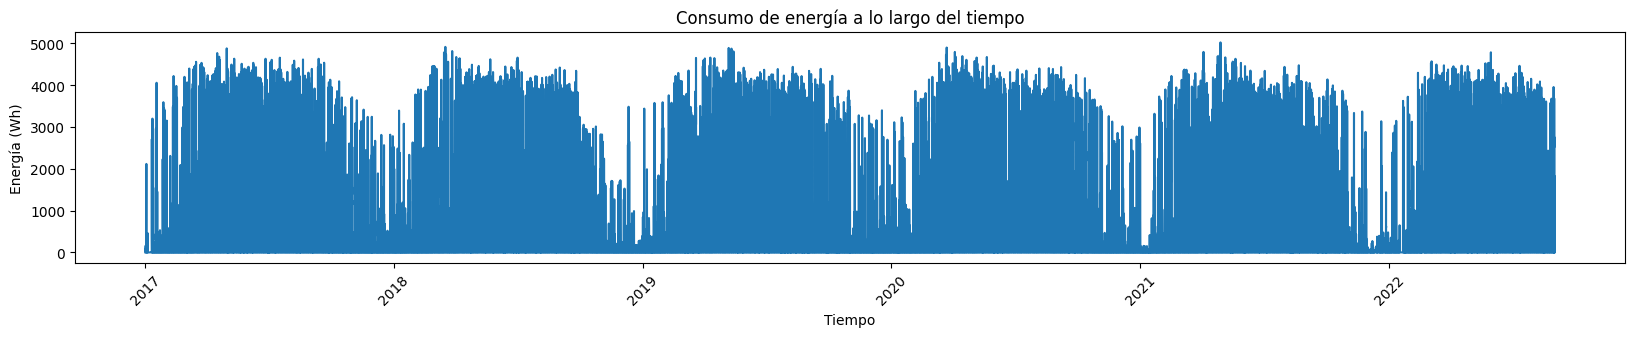

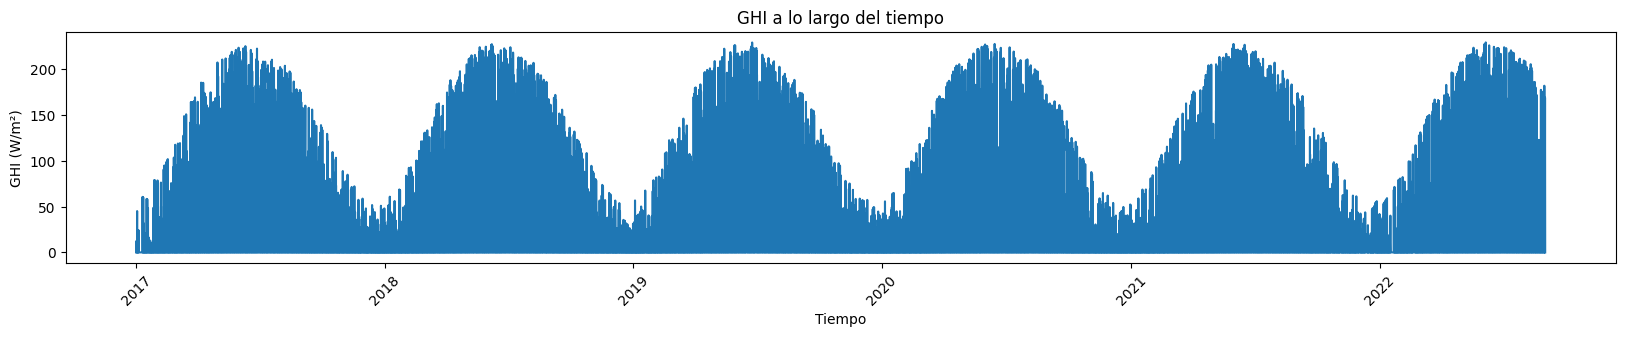

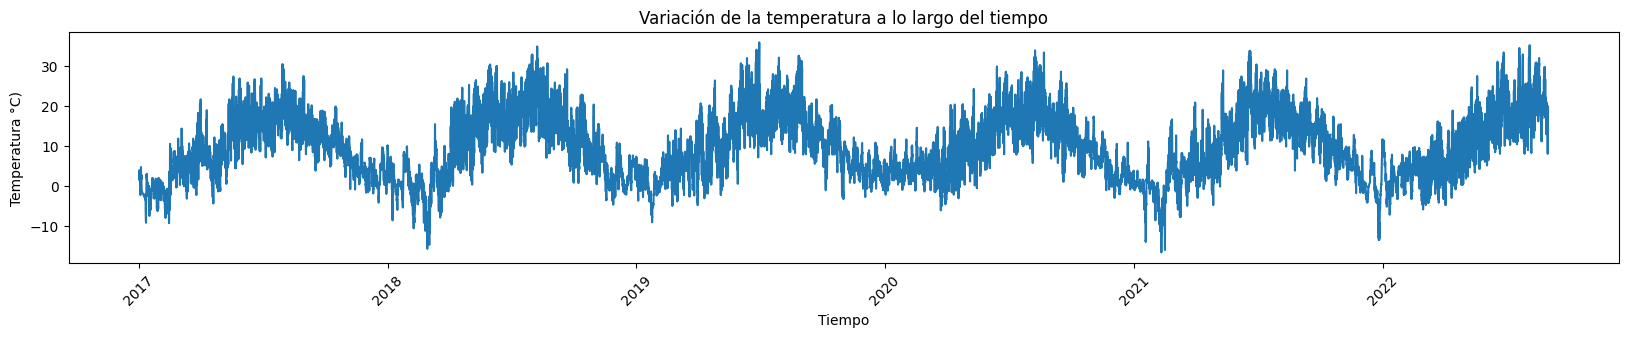

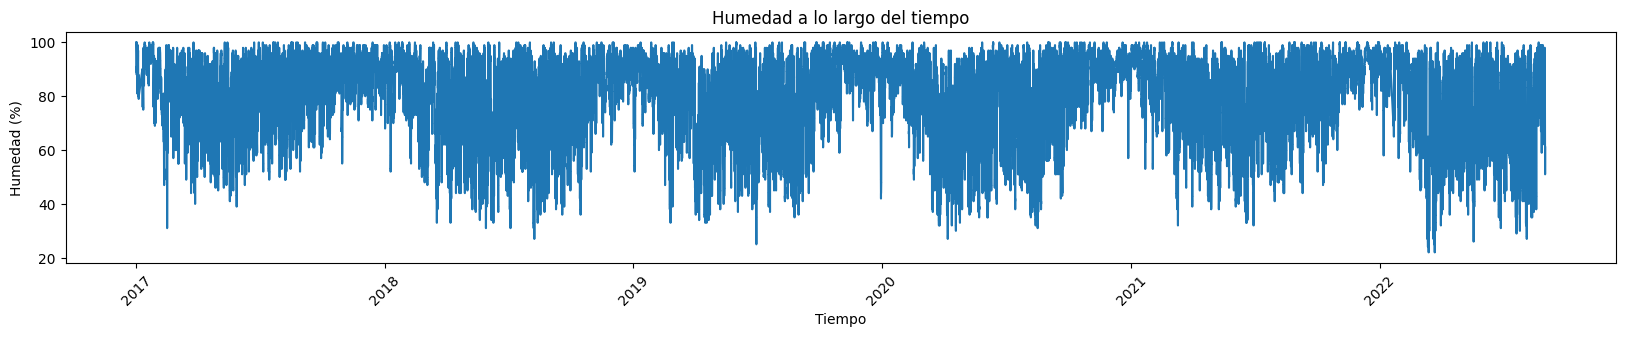

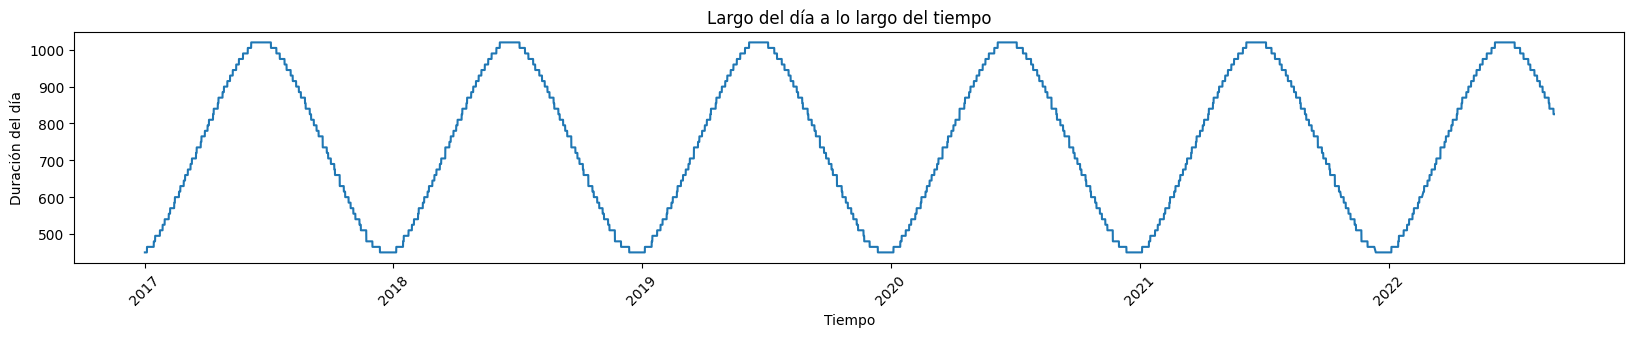

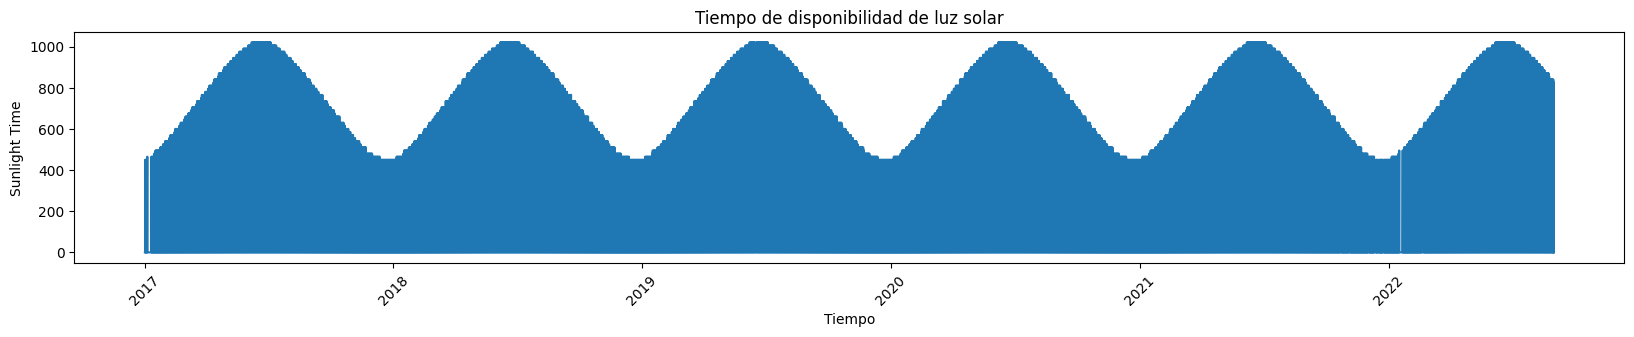

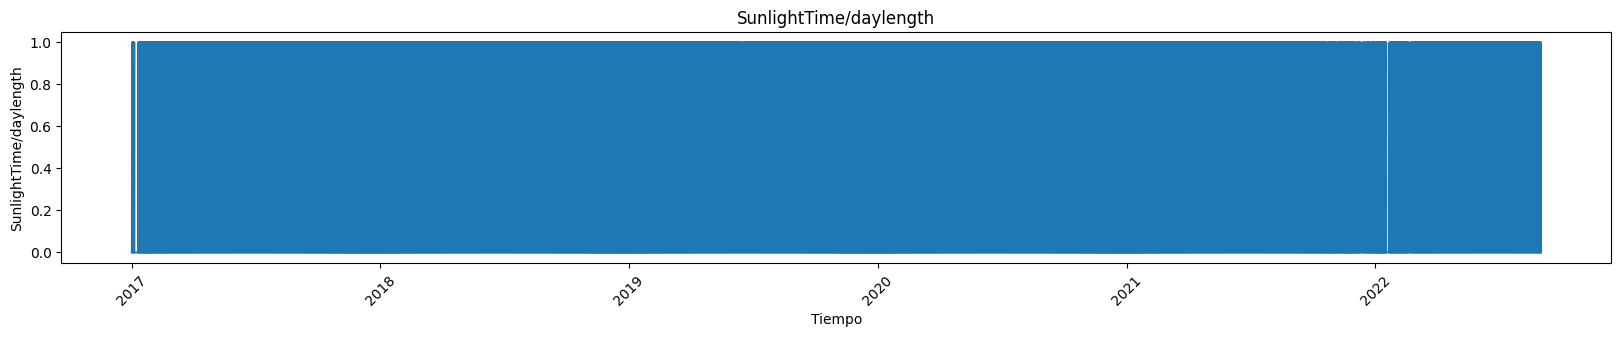

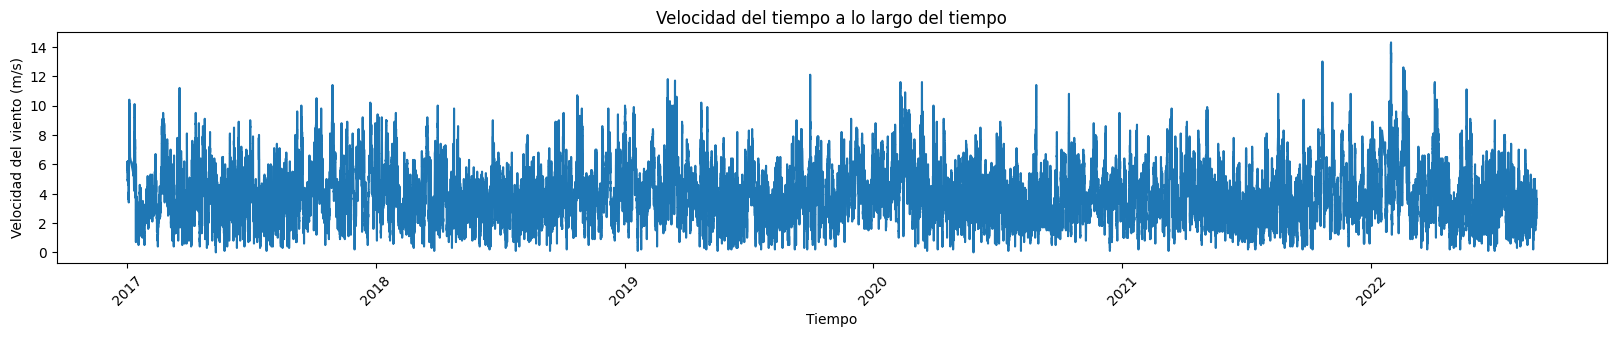

In [11]:
# Ensure 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Create line plot
plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='Energy delta[Wh]', data=df)
plt.title('Consumo de energía a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Energía (Wh)') #Ayuda a entender cómo las condiciones meteorológicas influyen en el consumo de energía, permitiendo analizar patrones y correlaciones.
plt.xticks(rotation=45) 
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='GHI', data=df)
plt.title('GHI a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('GHI (W/m²)') #Dato crucial para la producción de energía solar, ya que mide la cantidad de radiación solar disponible.
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='temp', data=df)
plt.title('Variación de la temperatura a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura °C)')
plt.xticks(rotation=45)  

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='humidity', data=df)
plt.title('Humedad a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Humedad (%)') #La humedad puede influir en la eficiencia de ciertos tipos de generación de energía y en el confort humano, afectando el consumo energético.
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='dayLength', data=df)
plt.title('Largo del día a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Duración del día') #La duración del día afecta la cantidad de luz solar disponible para la generación de energía solar.
plt.xticks(rotation=45) 


plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='sunlightTime', data=df)
plt.title('Tiempo de disponibilidad de luz solar')
plt.xlabel('Tiempo')
plt.ylabel('Sunlight Time') #La velocidad del viento en metros por segundo (m/s) medida a la misma altura que el piranómetro.
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='SunlightTime/daylength', data=df)
plt.title('SunlightTime/daylength')
plt.xlabel('Tiempo')
plt.ylabel('SunlightTime/daylength') # La relación entre el tiempo de luz solar y la duración del día.
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='wind_speed', data=df)
plt.title('Velocidad del tiempo a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad del viento (m/s)') #La velocidad del viento en metros por segundo (m/s) medida a la misma altura que el piranómetro.
plt.xticks(rotation=45)  
plt.show()

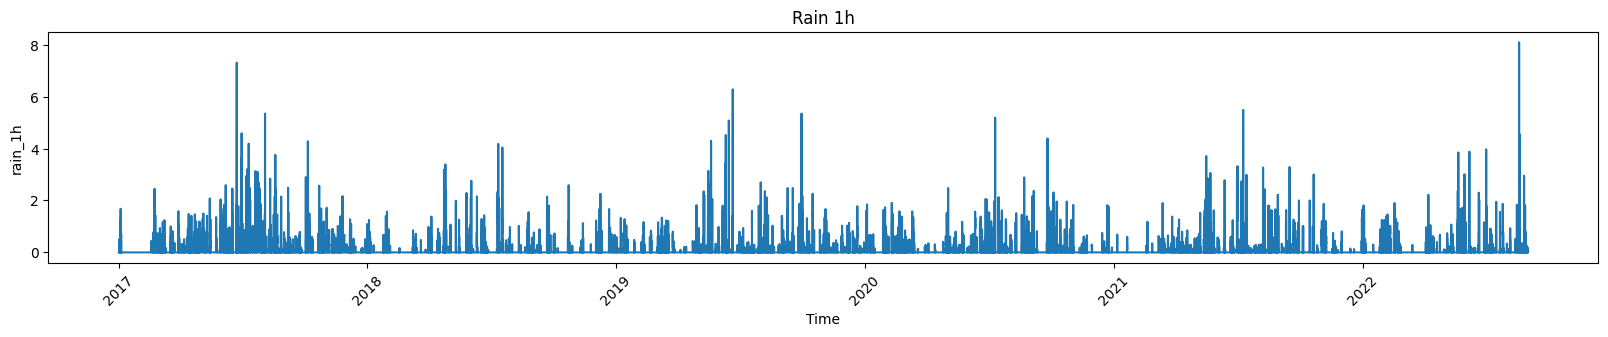

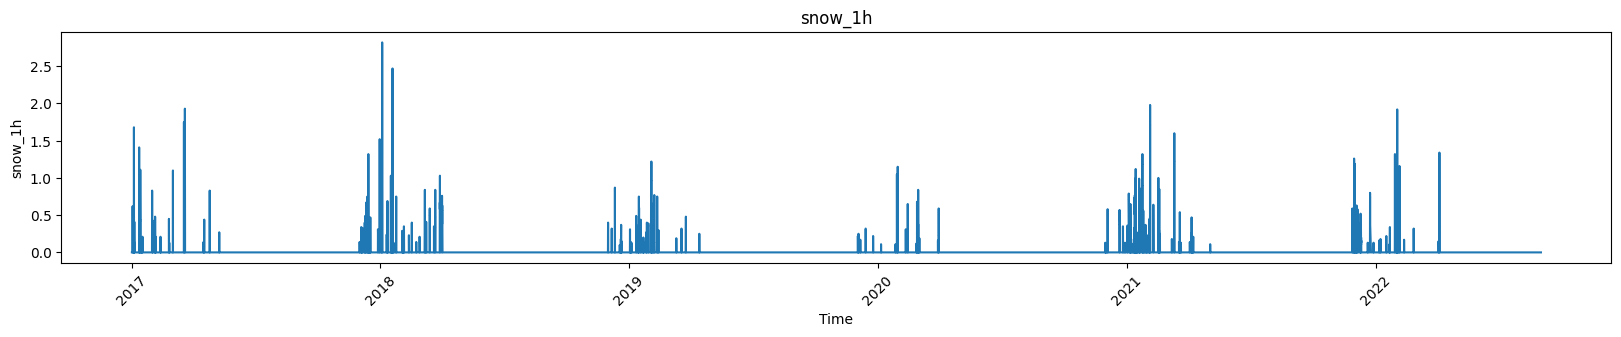

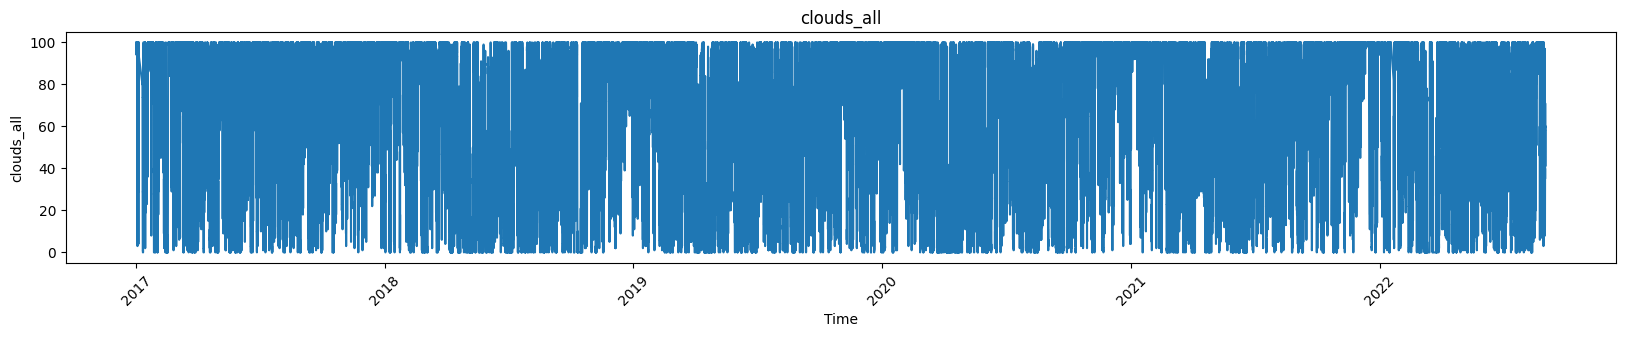

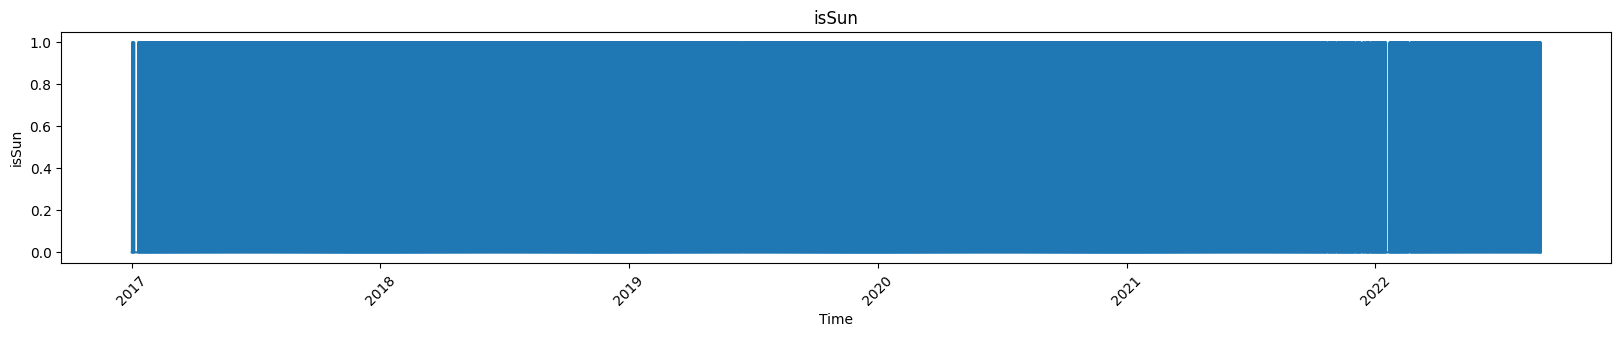

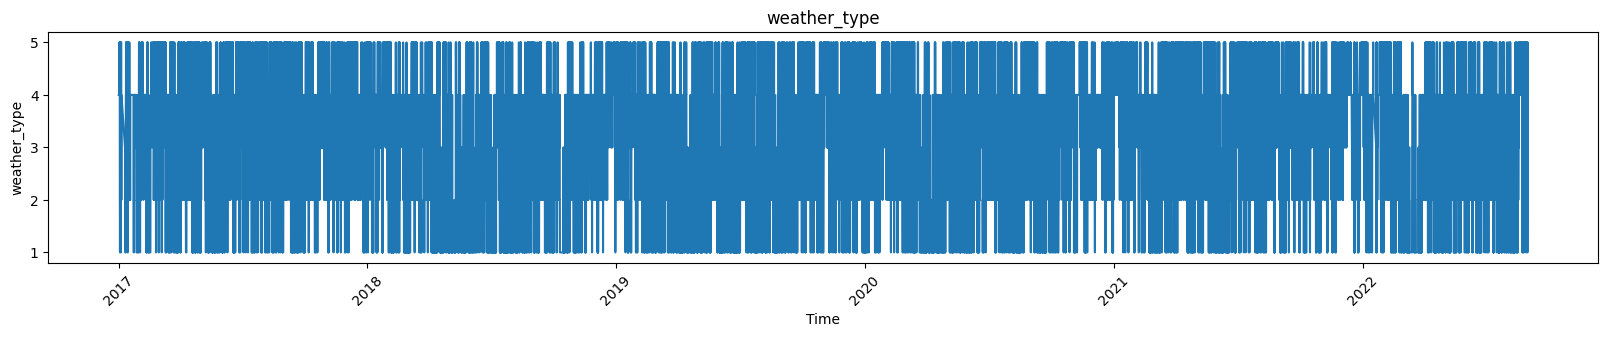

In [21]:

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='rain_1h', data=df)
plt.title('Rain 1h')
plt.xlabel('Time')
plt.ylabel('rain_1h')
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='snow_1h', data=df)
plt.title('snow_1h')
plt.xlabel('Time')
plt.ylabel('snow_1h')
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='clouds_all', data=df)
plt.title('clouds_all')
plt.xlabel('Time')
plt.ylabel('clouds_all')
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='isSun', data=df)
plt.title('isSun')
plt.xlabel('Time')
plt.ylabel('isSun')
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(20, 3))
sns.lineplot(x='Time', y='weather_type', data=df)
plt.title('weather_type')
plt.xlabel('Time')
plt.ylabel('weather_type')
plt.xticks(rotation=45)  
plt.show()

In [18]:
df['isSun'] = df['isSun'].astype('object')
df['weather_type'] = df['weather_type'].astype('object')
df['hour'] = df['hour'].astype('object')
df['month'] = df['month'].astype('object')

In [19]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 4 ['isSun', 'weather_type', 'hour', 'month']
Numeric columns: 12 ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']


Text(0.5, 1.0, 'Energy delta[Wh] v.s. isSun')

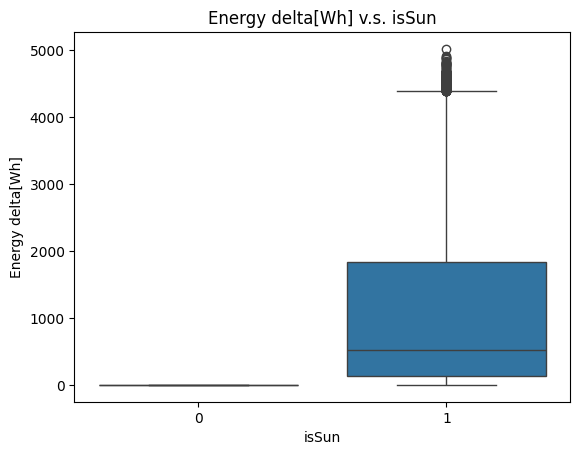

In [20]:
sns.boxplot(data=df, x=df['isSun'], y=df['Energy delta[Wh]'])
plt.title("Energy delta[Wh] v.s. isSun")

Text(0.5, 1.0, 'Energy delta[Wh] v.s. hour')

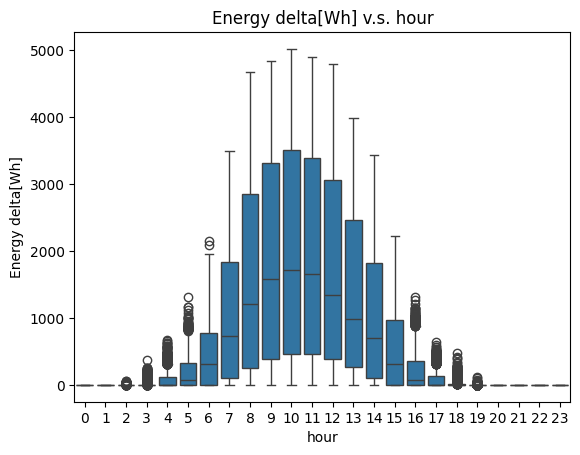

In [21]:
sns.boxplot(data=df, x=df['hour'], y=df['Energy delta[Wh]'])
plt.title("Energy delta[Wh] v.s. hour")

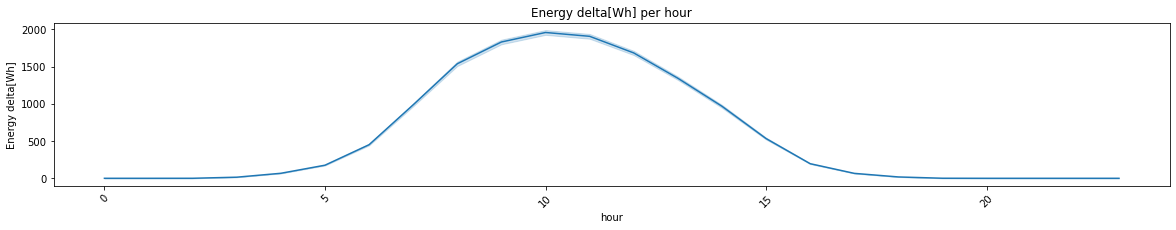

In [25]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='hour', y='Energy delta[Wh]', data=df)
plt.title('Energy delta[Wh] per hour')
plt.xlabel('hour')
plt.ylabel('Energy delta[Wh]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

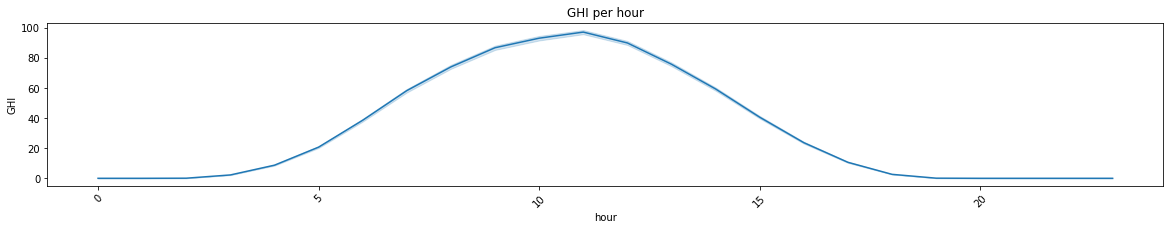

In [23]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='hour', y='GHI', data=df)
plt.title('GHI per hour')
plt.xlabel('hour')
plt.ylabel('GHI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Text(0.5, 1.0, 'Energy delta[Wh] v.s. month')

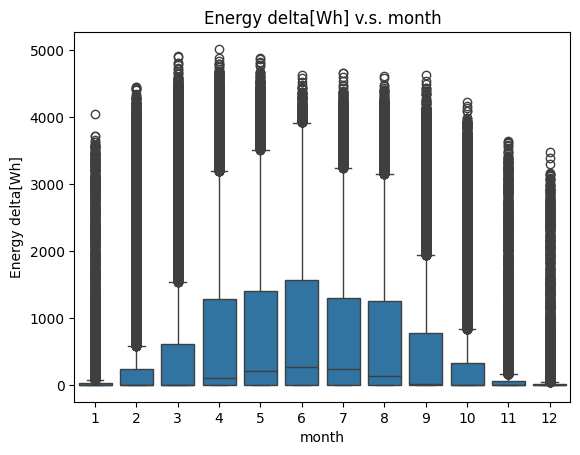

In [22]:
sns.boxplot(data=df, x=df['month'], y=df['Energy delta[Wh]'])
plt.title("Energy delta[Wh] v.s. month")

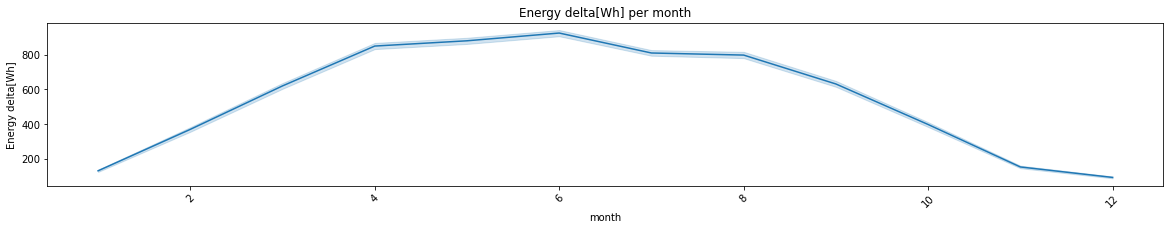

In [24]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='month', y='Energy delta[Wh]', data=df)
plt.title('Energy delta[Wh] per month')
plt.xlabel('month')
plt.ylabel('Energy delta[Wh]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

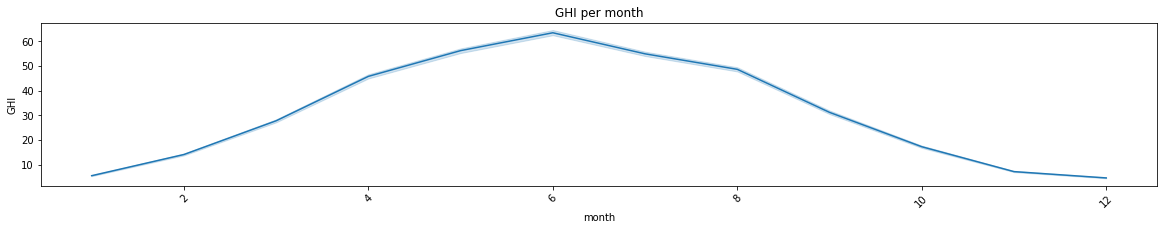

In [22]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='month', y='GHI', data=df)
plt.title('GHI per month')
plt.xlabel('month')
plt.ylabel('GHI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Text(0.5, 1.0, 'Energy delta[Wh] v.s. weather_type')

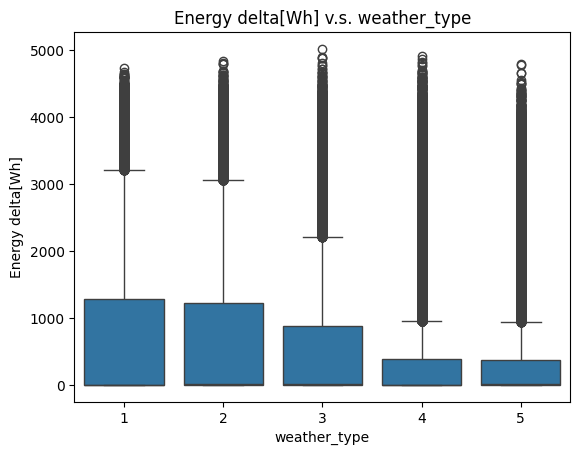

In [23]:
sns.boxplot(data=df, x=df['weather_type'], y=df['Energy delta[Wh]'])
plt.title("Energy delta[Wh] v.s. weather_type")

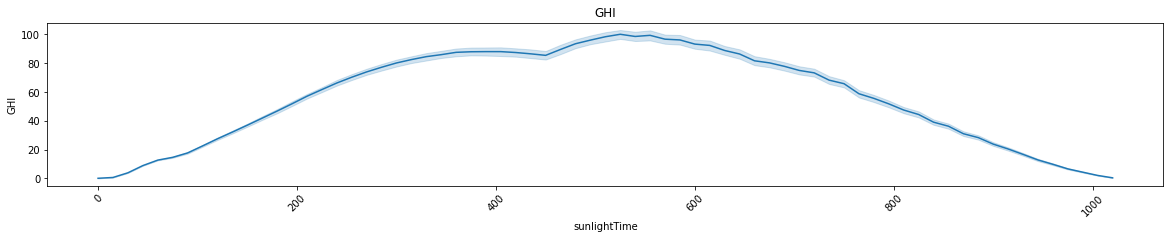

In [6]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='sunlightTime', y='GHI', data=df)
plt.title('GHI')
plt.xlabel('sunlightTime')
plt.ylabel('GHI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

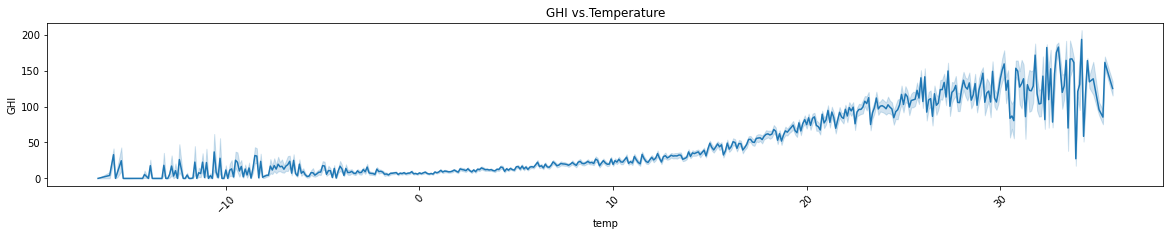

In [7]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='temp', y='GHI', data=df)
plt.title('GHI vs.Temperature')
plt.xlabel('temp')
plt.ylabel('GHI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

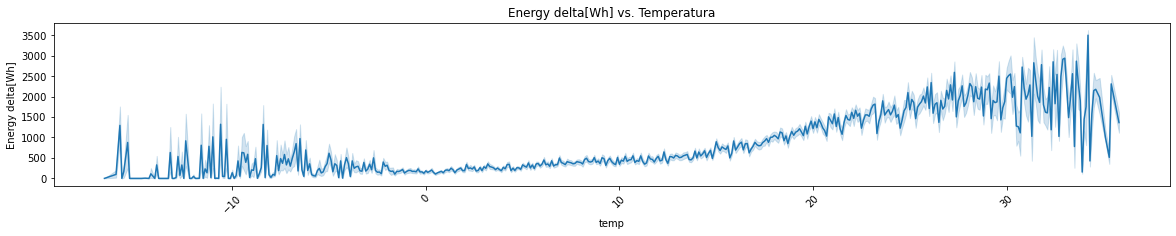

In [8]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='temp', y='Energy delta[Wh]', data=df)
plt.title('Energy delta[Wh] vs. Temperatura')
plt.xlabel('temp')
plt.ylabel('Energy delta[Wh]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

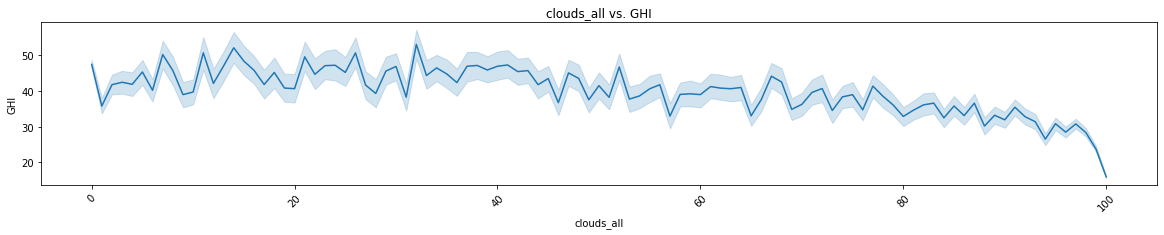

In [11]:
plt.figure(figsize=(20, 3))
sns.lineplot(x='clouds_all', y='GHI', data=df)
plt.title('clouds_all vs. GHI')
plt.xlabel('clouds_all')
plt.ylabel('GHI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

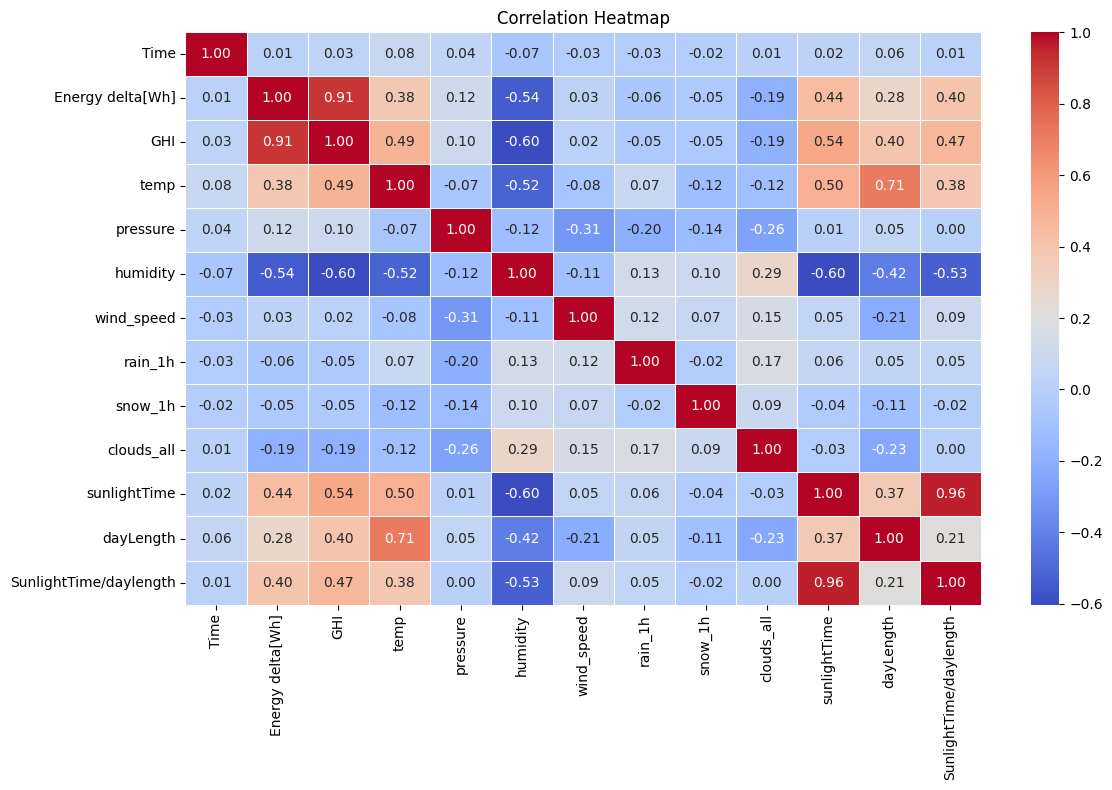

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.drop(cat_cols, axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

De acuerdo al conjunto de datos mostrado.la produción de energía solar esta estrechamente relacionada con la presencia de luz solar, indicada por la variable "isSun". Cuando "isSun" es 0, la producción de energía es casi nula, lo que demuestra que la disponibilidad de luz solar es un factor determinante en la generación de energía solar. Este hallazgo se alinea con la influencia de factores climáticos como la radiación solar y la nubosidad en la eficiencia de los paneles solares como se muestra en [1](https://solar21.es/condiciones-climaticas-en-la-produccion-en-energia-solar/). La radiación solar ("GHI") proporciona la energía necesaria para la producción solar, mientras que la nubosidad y los días nublados reducen significativamente la cantidad de radiación disponible, afectando negativamente la generación de energía.

El impacto de otros factores climáticos como la temperatura, la velocidad del viento y la humedad también es evidente en la correlación de "Energy_Delta" con variables como "hour", "month" y "weather_type". La temperatura influye en la eficiencia de los paneles solares, disminuyendo su rendimiento a medida que aumenta. La velocidad del viento y la humedad pueden interferir con la cantidad de radiación solar que llega a la superficie terrestre, reduciendo así la eficiencia de los paneles. Los gráficos respaldan estas relaciones, mostrando cómo las condiciones climáticas varían a lo largo del día y del año, y cómo estas variaciones afectan la producción de energía solar. La comprensión de estas correlaciones es crucial para optimizar la planificación y gestión de la energía solar, especialmente en el contexto de los desafíos planteados por el cambio climático y la necesidad de adaptar las tecnologías y prácticas de producción de energía renovable.

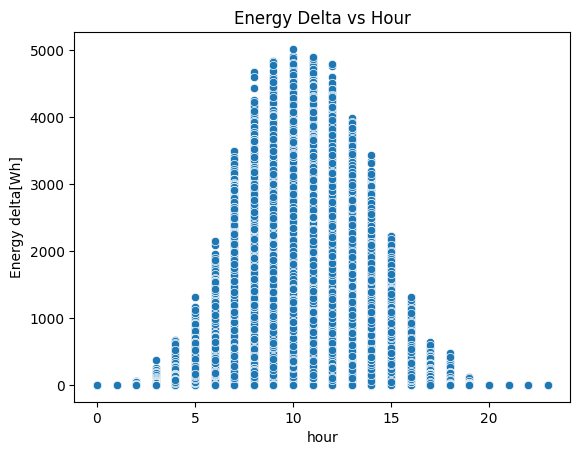

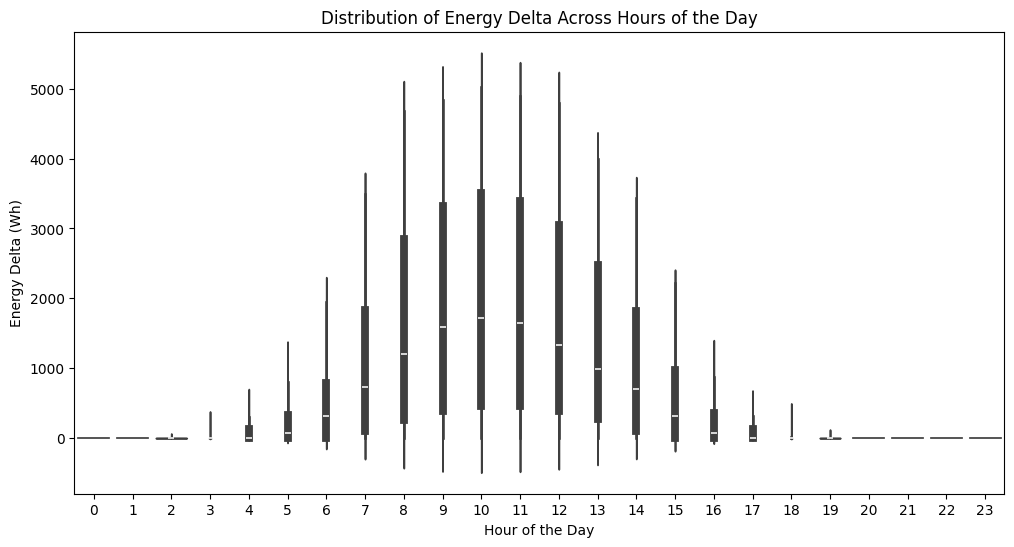

In [33]:
# Gráfico de dispersión de Energy_Delta vs hour
sns.scatterplot(x='hour', y='Energy delta[Wh]', data=df)
plt.title('Energy Delta vs Hour')
plt.show()

#Densidad de la energía producida a lo largo de las horas del día
plt.figure(figsize=(12, 6))
sns.violinplot(x='hour', y='Energy delta[Wh]', data=df)
plt.title('Distribution of Energy Delta Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Delta (Wh)')
plt.show()



Las graficas de dispersion y densidad entre la hora y el Delta de la energía producida indican que la generación de energía solar sigue un patrón diario consistente y simétrico. Este comportamiento es coherente con la naturaleza de la energía solar, que depende de la disponibilidad de luz solar, alcanzando su pico durante las horas centrales del día y disminuyendo durante las primeras y últimas horas del día. Este análisis confirma la importancia de la luz solar en la producción de energía y puede ser útil para la planificación y optimización del uso de energía solar.